In [ ]:
# ..... look at clusters from different algos ..... #

In [2]:
library(Seurat)
library(ggplot2)
library(data.table)
library(dplyr)

In [3]:
# Qiu marker sets for main subtypes
neuron_markers = c('OTX2', 'PAX6', 'PAX2', 'PAX5', 'EOMES', 'SLC17A6', 'GAD1', 'SLC32A1', 'NEUROD1', 'SOX10')

meso_markers = c('PAX3', 'PAX7', 'PAX1', 'PAX9', 'TBX6', 'TBX5', 'HCN4', 'GATA4', 'MYF5')

endo_markers = c('KDR', 'CDH5', 'PECAM1')

epi_markers = c('CDH3', 'TRP63', 'TFAP2B', 'EGFR', 'KRT5', 'KRT14')

ery_markers = c('TSPAN8', 'SNCA', 'HBB-BS', 'ABCB4', 'SLC4A1', 'KEL', 'CD36', 'GYPA', 'HBB-BH1', 'HBA-A1',
               'HBA-X', 'HBB-Y', 'ZFPM1', 'HBZ')

wbc_markers = c('MS4A4A', 'APOE', 'LYZ2', 'SELENOP', 'PTPRC', 'LY86', 'CD34')

lung_markers = c('FOXP2', 'MKI67', 'ETV5', 'NKX2-1')

b_t_mast_markers = c('CD3E', 'CD4', 'CD8A', 'CD19', 'CD27', 'PTPRC', 'KIT', 'CD200R3')

megak_markers = c('PF4', 'ITGB3', 'ITGA2B', 'CD226')

In [4]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [81]:
# load data
id = 8
sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))

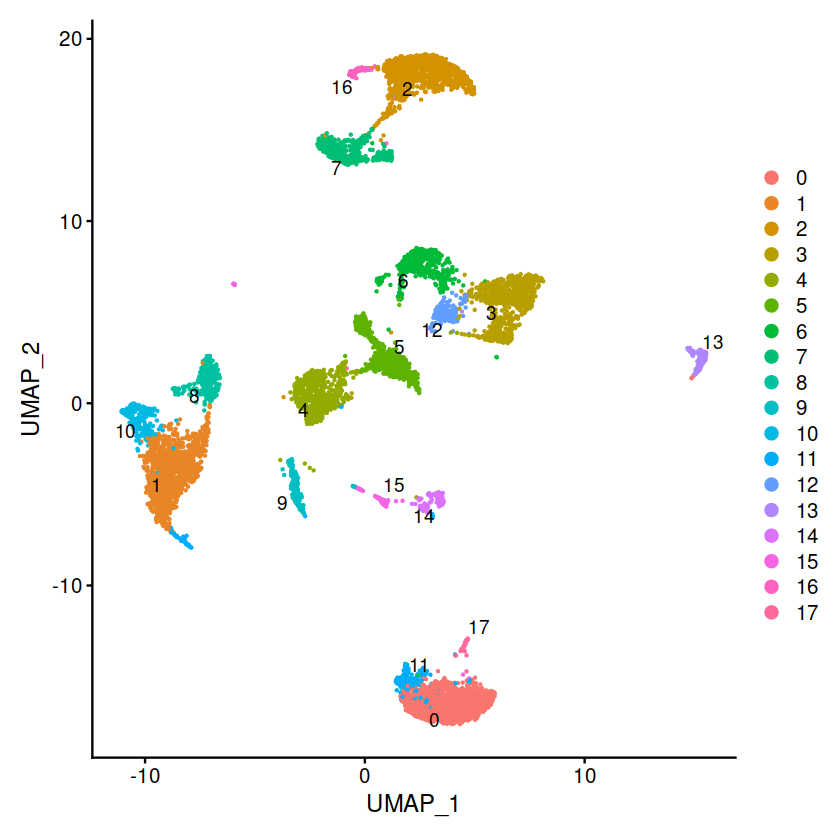

In [82]:
plot <- DimPlot(sc1)
LabelClusters(plot, id = 'ident')

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: HBB-BS, ABCB4, KEL, GYPA, HBB-BH1, HBA-A1, HBA-X, HBB-Y”


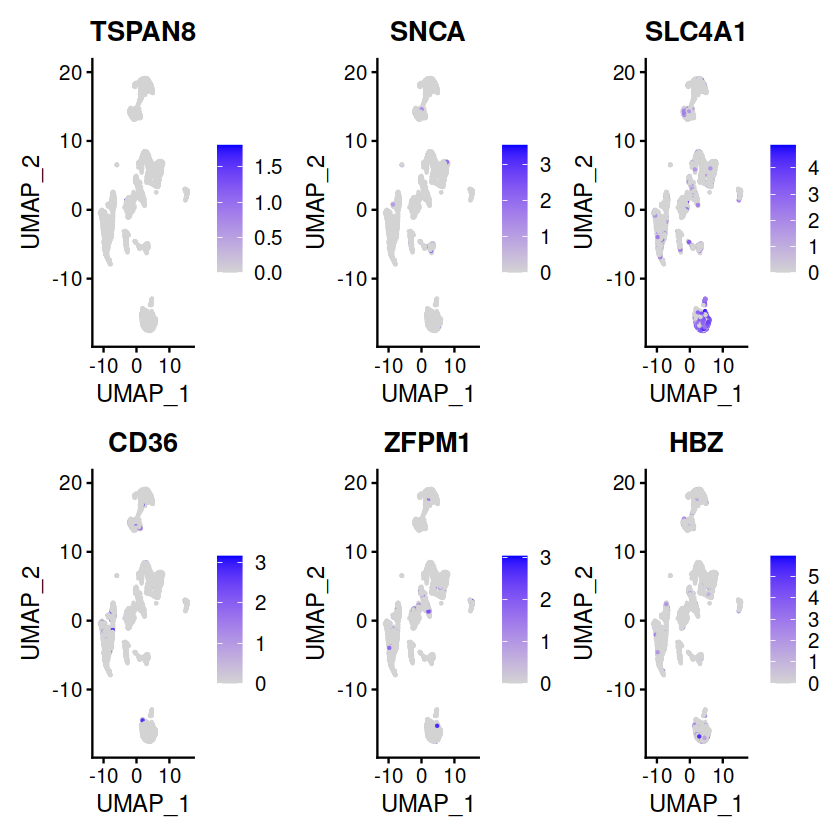

In [84]:
FeaturePlot(sc1, features = ery_markers, ncol = 3)

In [85]:
load(paste0(stages[id], '_', samples[id], '_clusters_SHC.Rdata'))
sc1$shc_clusters = clusters[[1]]

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


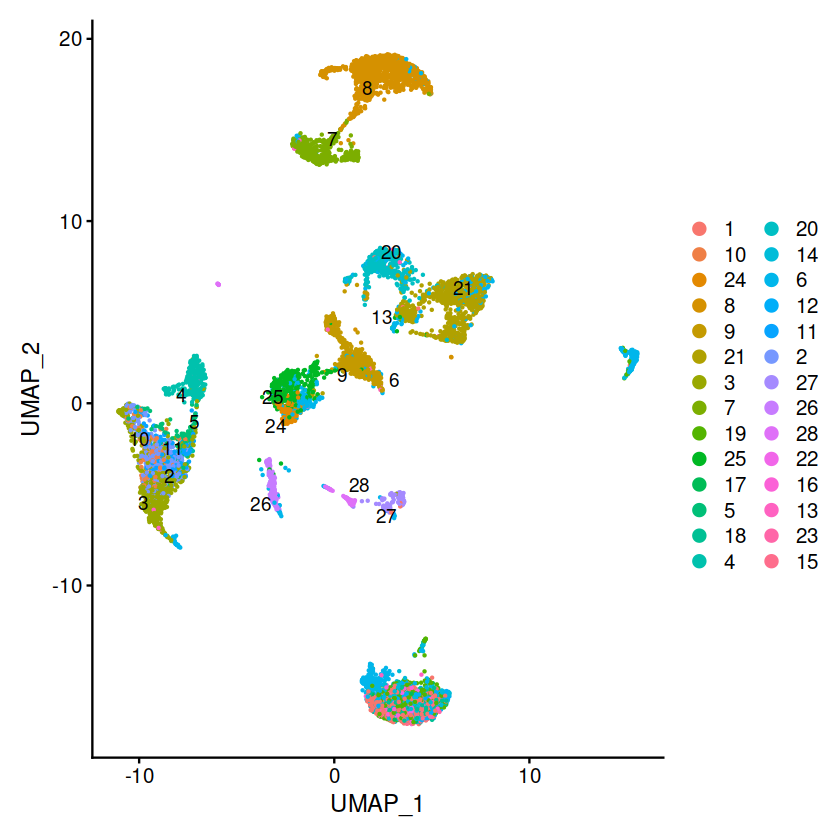

In [86]:
Idents(sc1) = 'shc_clusters'
plot <- DimPlot(sc1)
LabelClusters(plot, id = 'ident')

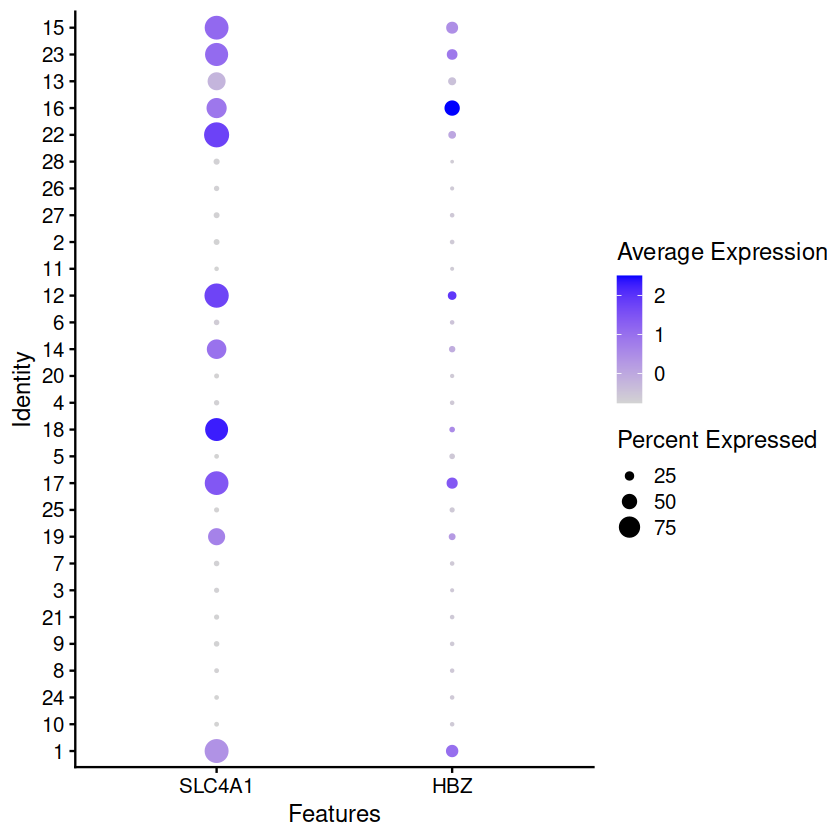

In [87]:
DotPlot(sc1, features = c('SLC4A1', 'HBZ'))

In [88]:
m1 = read.delim(paste0(stages[id], '_', samples[id], '_Qiu_E11.5_celltypes.csv'), sep = ',')
sc1$Qiu = m1$class[match(colnames(sc1), m1$barcode)]
m1[1,]

m2 = read.delim(paste0(stages[id], '_', samples[id], '_mantri_celltypes.csv'), sep = ',')
sc1$Mantri = m2$predicted[match(colnames(sc1), rownames(m2))]
m2[1,]

barcode                             class               celltype
1 stage32_sample12_AAACCCAAGATCGGTG-1 Primitive_erythroid NA      
  final_celltype     
1 Primitive_erythroid

group predicted    score    enrichment
stage32_sample12_AAACCCAAGATCGGTG-1 all   Erythrocytes 2.994641 2.629864

In [100]:
ccs = c(23)
table(sc1$Qiu[sc1$shc_clusters %in% ccs])
table(sc1$Mantri[sc1$shc_clusters %in% ccs])
# table(sc1$Qiu[sc1$seurat_clusters %in% c(2,3)])


Definitive_erythroid  Primitive_erythroid 
                   7                   16 


Erythrocytes 
          23 